# Adjacency matrices 
A quick way to look at:
- the average adjacency matrix of our lamina circuits 
- the variance of each type of synaptic connection

In [1]:
import numpy as np
import pandas as pd
import os.path
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import seaborn as sns
import itertools
from sklearn.linear_model import LinearRegression

from cx_analysis.utils import yymmdd_today
from cx_analysis.vis.hex_lattice import hexplot
from cx_analysis.vis.fig_tools import linear_cmap, subtype_cm

In [2]:
save_figs=False
fig_path = f'lamina_figures/{yymmdd_today()}_'

In [3]:
tp = '210809'  
cx = pd.read_pickle('Data/210809_cxdf.pickle')
# R1-6 split into duet and quartet instead of pairs
subtypes = np.unique([*cx["pre_type"], *cx["post_type"]])

display(cx)
#cx.to_excel(f'~/Data/{tp}_lamina/lamina_cx-counts.xlsx')

,om,cx_type,pre_type,post_type,n_connect
0,A0,LMC_1->LMC_1,LMC_1,LMC_1,0.0
1,A0,LMC_1->LMC_2,LMC_1,LMC_2,0.0
2,A0,LMC_1->LMC_3,LMC_1,LMC_3,0.0
3,A0,LMC_1->LMC_4,LMC_1,LMC_4,0.0
4,A0,LMC_1->LMC_N,LMC_1,LMC_N,0.0
...,...,...,...,...,...
3504,E7,centri->R_quartet,centri,R_quartet,3.0
3505,E7,centri->R7,centri,R7,14.0
3506,E7,centri->R7p,centri,R7p,18.0
3507,E7,centri->R8,centri,R8,8.0


In [5]:
# set L4 connection counts as NaN for cartridges without L4
for i, row in cx.iterrows():
    if row['om'] in ['B0', 'C1', 'D2', 'E4', 'E5', 'E6', 'E7']:
        if row['post_type'] == 'LMC_4' or row['pre_type'] == 'LMC_4':
            cx.loc[i, 'n_connect'] = np.nan
        else:
            continue
    else: 
        continue


adj_mn = pd.pivot_table(cx, values='n_connect', index='pre_type', columns='post_type')
display(adj_mn.round(decimals=1))

adj_var = pd.pivot_table(cx, values='n_connect', index='pre_type', columns='post_type', aggfunc=np.var)
display((adj_var).round(decimals=1))

adj_sd = pd.pivot_table(cx, values='n_connect', index='pre_type', columns='post_type', aggfunc=np.std)
display(adj_sd.round(decimals=1))

adj_sum = pd.pivot_table(cx, values='n_connect', index='pre_type', columns='post_type', aggfunc=np.sum)
display('Connection sum', adj_sum)


# adj_mn.to_csv(f'~/Data/{tp}_lamina/{tp}_mean.csv')
# adj_var.to_csv(f'~/Data/{tp}_lamina/{tp}_variance.csv')

post_type,LMC_1,LMC_2,LMC_3,LMC_4,LMC_N,R7,R7p,R8,R_duet,R_quartet,centri
pre_type,,,,,,,,,,,
LMC_1,0.1,0.5,0.7,0.2,0.1,0.1,0.5,0.4,0.1,0.0,0.1
LMC_2,21.9,5.1,13.0,18.2,0.2,2.0,4.2,2.6,1.6,0.2,4.0
LMC_3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_N,3.5,1.3,3.1,0.4,0.1,0.0,0.3,0.1,0.1,0.6,0.4
R7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
R7p,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
R8,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0
R_duet,35.2,53.4,37.3,17.6,0.8,1.0,12.6,1.1,2.8,0.9,33.4


post_type,LMC_1,LMC_2,LMC_3,LMC_4,LMC_N,R7,R7p,R8,R_duet,R_quartet,centri
pre_type,,,,,,,,,,,
LMC_1,0.2,1.0,1.2,0.3,0.1,0.1,1.0,1.0,0.1,0.0,0.1
LMC_2,23.6,20.3,46.1,33.4,0.6,5.2,14.3,4.0,4.8,0.4,17.5
LMC_3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_N,14.5,2.2,11.3,0.7,0.1,0.0,0.3,0.1,0.2,1.7,1.0
R7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
R7p,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
R8,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0
R_duet,40.9,98.4,63.8,46.2,2.4,2.5,28.6,2.8,4.5,1.2,104.7


post_type,LMC_1,LMC_2,LMC_3,LMC_4,LMC_N,R7,R7p,R8,R_duet,R_quartet,centri
pre_type,,,,,,,,,,,
LMC_1,0.4,1.0,1.1,0.5,0.3,0.4,1.0,1.0,0.4,0.0,0.4
LMC_2,4.9,4.5,6.8,5.8,0.8,2.3,3.8,2.0,2.2,0.6,4.2
LMC_3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_4,0.2,0.2,0.2,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0
LMC_N,3.8,1.5,3.4,0.9,0.4,0.0,0.6,0.3,0.4,1.3,1.0
R7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
R7p,0.2,0.2,0.4,0.0,0.0,0.0,0.2,0.2,0.2,0.0,0.0
R8,0.2,0.0,0.0,0.0,0.0,0.3,0.2,0.0,0.0,0.0,0.2
R_duet,6.4,9.9,8.0,6.8,1.5,1.6,5.3,1.7,2.1,1.1,10.2


'Connection sum'

post_type,LMC_1,LMC_2,LMC_3,LMC_4,LMC_N,R7,R7p,R8,R_duet,R_quartet,centri
pre_type,,,,,,,,,,,
LMC_1,4.0,14.0,19.0,4.0,2.0,2.0,15.0,12.0,4.0,0.0,4.0
LMC_2,636.0,149.0,378.0,401.0,5.0,58.0,123.0,74.0,45.0,5.0,115.0
LMC_3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_4,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
LMC_N,102.0,37.0,91.0,9.0,2.0,0.0,10.0,3.0,4.0,18.0,13.0
R7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
R7p,1.0,1.0,2.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
R8,1.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,1.0
R_duet,1020.0,1550.0,1083.0,387.0,24.0,28.0,365.0,32.0,80.0,25.0,968.0


In [5]:
R1_6_count = dict()
lvf_inputs = dict()
lvf_inputs_from_pr = dict()
total_count = dict()

for om, rows in cx.groupby('om'):
    total_cx = rows['n_connect'].sum()
    total_count[om] = total_cx
    R1_6_rows = rows.loc[[i for i, t in rows['pre_type'].items() if t[0:2] == 'R_']]
    R1_6_count[om] = R1_6_rows['n_connect'].sum()
    
    lvf_input_rows = rows.loc[[i for i, t in rows['post_type'].items() if t in ['R7', 'R8', 'R7p']]]
    lvf_inputs_from_pr_rows = lvf_input_rows.loc[[i for i, t in lvf_input_rows['pre_type'].items() if t[0:2] == 'R_']]
    lvf_inputs[om] = lvf_input_rows['n_connect'].sum()
    lvf_inputs_from_pr[om] = lvf_inputs_from_pr_rows['n_connect'].sum()

R1_6 = pd.DataFrame(data=[R1_6_count, total_count]).T
R1_6 = R1_6.rename(columns={0: 'R1_6_count', 1:'total'})

lvf = pd.Series(data=lvf_inputs_from_pr)
#display(R1_6)

print(f"Average % R1_6: {(R1_6['R1_6_count'] / R1_6['total']).mean()}")
print(f"% R1_6 SD: {(R1_6['R1_6_count'] / R1_6['total']).std(ddof=0)}")
print(f"Average inputs to lvfs: {lvf.mean()} +- {lvf.std(ddof=0)}")

display(lvf)

Average % R1_6: 0.6834152939559396
% R1_6 SD: 0.0401526606346494
Average inputs to lvfs: 20.551724137931036 +- 6.724049513123369


A0    10.0
A1    31.0
A2    20.0
A3    32.0
A4    20.0
A5    17.0
B0    31.0
B1    35.0
B2    24.0
B3    24.0
B4    21.0
B5    12.0
B6    15.0
C1    22.0
C2    26.0
C3    19.0
C4    21.0
C5    21.0
C6    18.0
D2    22.0
D3    20.0
D4    27.0
D5    16.0
D6    11.0
D7    10.0
E4    24.0
E5    10.0
E6    24.0
E7    13.0
dtype: float64

In [6]:
sum_across_om = dict()
observed_one_or_more = []
for cxt, rows in cx.groupby('cx_type'):
    sum_across_om.update({cxt: rows['n_connect'].sum()})
    
    non_zero_rows = rows[rows['n_connect'] > 0.0]
    if len(non_zero_rows['om'].unique()) == 29.0:
        observed_one_or_more.append(cxt)
    
sum_across_om = pd.Series(sum_across_om)
display(sum_across_om.sort_values())

print('Number of connection types never observed')
print(len(sum_across_om[sum_across_om == 0.0]))
print('Number of connection types with mean count across om < 1.0')
print(len(sum_across_om[sum_across_om < 29.0]))
print('Number of connection types observed at least once in each om')
print(len(observed_one_or_more))
print('Number of connections 


R7->R7                 0.0
LMC_3->R7p             0.0
LMC_3->R8              0.0
R7->LMC_N              0.0
LMC_3->R_quartet       0.0
                     ...  
R_duet->LMC_3       1083.0
R_quartet->LMC_3    1151.0
R_duet->LMC_2       1550.0
R_quartet->LMC_1    2007.0
R_quartet->LMC_2    2448.0
Length: 121, dtype: float64

Number of connection types never observed
43
Number of connection types with mean count across om < 1.0
82
Number of connection types observed at least once in each om
16


In [7]:
l4_in = cx.loc[cx['post_type'] == 'LMC_4']
display(l4_in.loc[l4_in['n_connect'].isna()])

,om,cx_type,pre_type,post_type,n_connect
729,B0,LMC_1->LMC_4,LMC_1,LMC_4,NaN
740,B0,LMC_2->LMC_4,LMC_2,LMC_4,NaN
751,B0,LMC_3->LMC_4,LMC_3,LMC_4,NaN
762,B0,LMC_4->LMC_4,LMC_4,LMC_4,NaN
773,B0,LMC_N->LMC_4,LMC_N,LMC_4,NaN
...,...,...,...,...,...
3457,E7,R_quartet->LMC_4,R_quartet,LMC_4,NaN
3468,E7,R7->LMC_4,R7,LMC_4,NaN
3479,E7,R7p->LMC_4,R7p,LMC_4,NaN
3490,E7,R8->LMC_4,R8,LMC_4,NaN


In [8]:
ctype_order = ['R_duet', 'R_quartet', 'R7', 'R8', 'R7p', 'LMC_1', 'LMC_2', 'LMC_3', 'LMC_4', 'LMC_N', 'centri']
ordered_mn = adj_mn.reindex(ctype_order).reindex(ctype_order, axis=1)
ordered_sd = adj_sd.reindex(ctype_order).reindex(ctype_order, axis=1)

In [9]:
n_cx_observed = dict()

for cx_type, rows in cx.groupby('cx_type'):
    post_type = rows.iloc[0]['post_type']
    this_n = sum([c > 0.0 for c in rows['n_connect']])
    n_cx_observed.update({cx_type: this_n})

n_cx_observed = pd.Series(n_cx_observed)
display(n_cx_observed[n_cx_observed == 29])
display(n_cx_observed[n_cx_observed == 28])
display(n_cx_observed[n_cx_observed == 27])

LMC_2->LMC_1         29
R_duet->LMC_1        29
R_duet->LMC_2        29
R_duet->LMC_3        29
R_duet->R7p          29
R_duet->centri       29
R_quartet->LMC_1     29
R_quartet->LMC_2     29
R_quartet->LMC_3     29
R_quartet->R_duet    29
centri->LMC_1        29
centri->LMC_2        29
centri->LMC_3        29
centri->R7p          29
centri->R8           29
centri->R_duet       29
dtype: int64

LMC_2->LMC_3         28
R_quartet->centri    28
dtype: int64

Series([], dtype: int64)

In [1]:
n_cx_observed

NameError: name 'n_cx_observed' is not defined

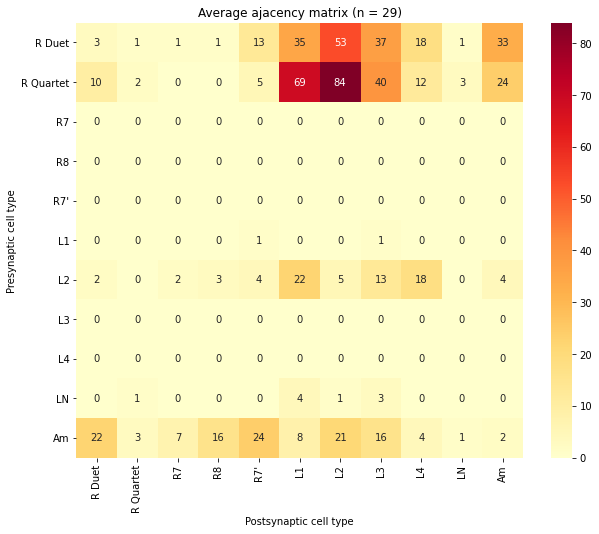

In [10]:
fig, ax = plt.subplots(1, figsize=(10, 8))

labels = ['R Duet', 'R Quartet', 'R7', 'R8', "R7'", 'L1', 'L2', 'L3', 'L4', 'LN', 'Am']

sns.heatmap(ordered_mn.round(), annot=True, ax=ax,cmap='YlOrRd', xticklabels=labels, yticklabels=labels)
ax.set_title('Average ajacency matrix (n = 29)')
ax.set_xlabel('Postsynaptic cell type')
ax.set_ylabel('Presynaptic cell type')
if save_figs:
    fig.savefig(fig_path + "mean-adj.png")
    fig.savefig(fig_path + "mean-adj.svg")

Text(0.5, 1.0, 'Average ajacency matrix (n = 29)')

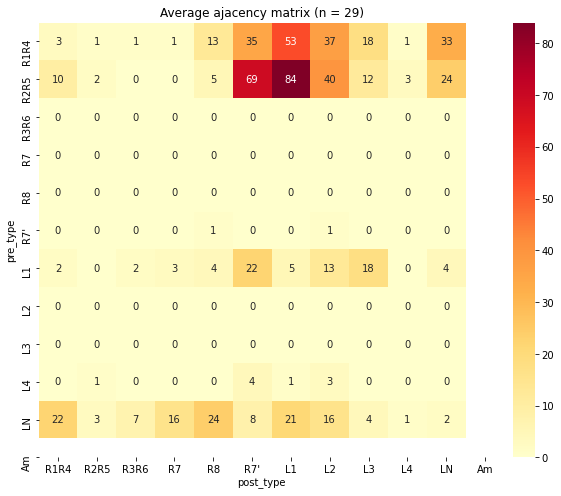

In [11]:
fig, ax = plt.subplots(1, figsize=(10, 8))

labels = ['R1R4', 'R2R5', 'R3R6', 'R7', 'R8', "R7'", 'L1', 'L2', 'L3', 'L4', 'LN', 'Am']

sns.heatmap(ordered_mn.round(), annot=True, ax=ax,cmap='YlOrRd', xticklabels=labels, yticklabels=labels)
ax.set_title('Average ajacency matrix (n = 29)')
#fig.savefig("/mnt/home/nchua/Dropbox/200615_mean-adj-order.pdf")

Text(0.5, 1.0, 'Standard deviations of adjacency matrix elements (n = 29)')

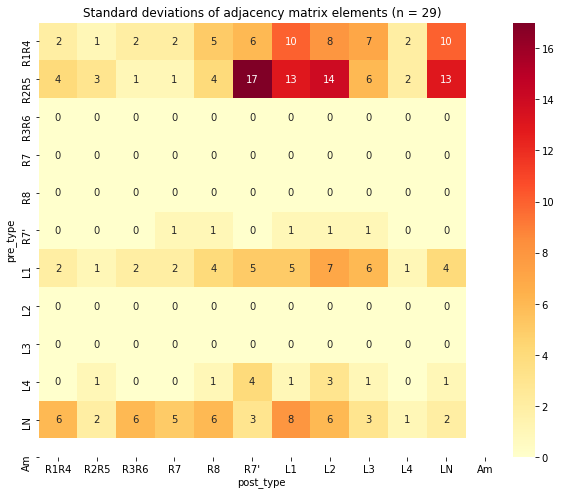

In [13]:
fig, ax = plt.subplots(1, figsize=(10, 8))

sns.heatmap(ordered_sd.round(), annot=True, ax=ax,cmap='YlOrRd', xticklabels=labels, yticklabels=labels)
ax.set_title('Standard deviations of adjacency matrix elements (n = 29)')
#fig.savefig("/mnt/home/nchua/Dropbox/200615_sd-adj-order.pdf")

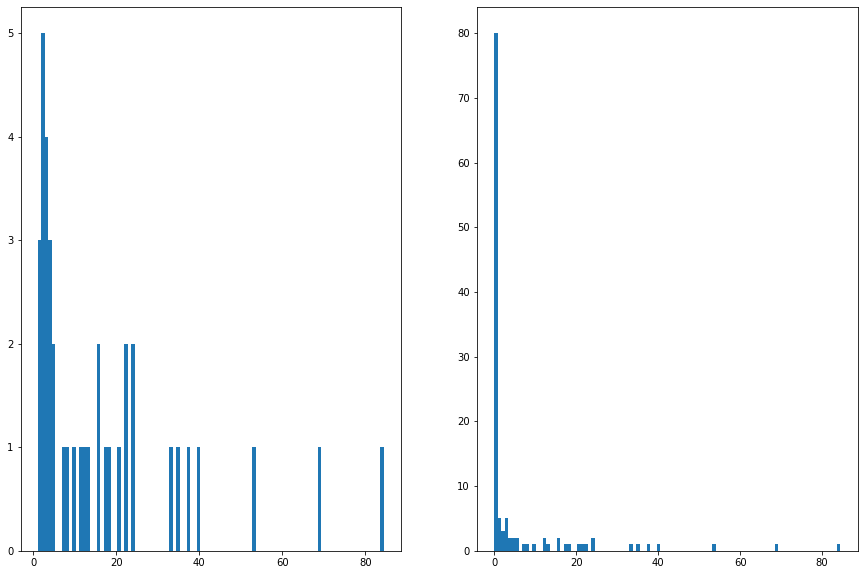

In [14]:
# distribution of connection counts 
fig, ax = plt.subplots(1, 2, figsize=[15, 10])

x = [c for c in ordered_mn.to_numpy().flatten() if c >= 1.0]
ax[0].hist(x, bins=100)

x = [c for c in ordered_mn.to_numpy().flatten()]
ax[1].hist(x, bins=100)

plt.show()

## Circle diameter for weighted subway map

In [15]:
display(ordered_mn)

post_type,R_duet,R_quartet,R7,R8,R7p,LMC_1,LMC_2,LMC_3,LMC_4,LMC_N,centri
pre_type,,,,,,,,,,,
R_duet,2.758621,0.862069,0.965517,1.103448,12.586207,35.172414,53.448276,37.344828,17.590909,0.827586,33.379310
R_quartet,10.034483,2.310345,0.275862,0.482759,5.137931,69.206897,84.413793,39.689655,11.818182,2.793103,24.034483
R7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
R8,0.000000,0.000000,0.068966,0.000000,0.034483,0.034483,0.000000,0.000000,0.000000,0.000000,0.034483
R7p,0.034483,0.000000,0.000000,0.034483,0.034483,0.034483,0.034483,0.068966,0.000000,0.000000,0.000000
LMC_1,0.137931,0.000000,0.068966,0.413793,0.517241,0.137931,0.482759,0.655172,0.181818,0.068966,0.137931
LMC_2,1.551724,0.172414,2.000000,2.551724,4.241379,21.931034,5.137931,13.034483,18.227273,0.172414,3.965517
LMC_3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
LMC_4,0.000000,0.000000,0.000000,0.000000,0.000000,0.045455,0.045455,0.045455,0.000000,0.045455,0.000000


In [16]:
trans_func = lambda x: 0.15 + np.floor(x/5) * 0.05

display([[x, trans_func(x)] for x in [5.0, 15.0, 30.0, 50.0, 70.0]])

sig_cx = ordered_mn.copy()
for i, row in sig_cx.iterrows():
    for ii, v in row.iteritems():
        if v < 5.0:
            sig_cx.loc[i, ii] = np.nan
        else:
            continue
circle_size = sig_cx.apply(trans_func)
display(circle_size)

[[5.0, 0.2],
 [15.0, 0.30000000000000004],
 [30.0, 0.45000000000000007],
 [50.0, 0.65],
 [70.0, 0.8500000000000001]]

post_type,R_duet,R_quartet,R7,R8,R7p,LMC_1,LMC_2,LMC_3,LMC_4,LMC_N,centri
pre_type,,,,,,,,,,,
R_duet,NaN,NaN,NaN,NaN,0.25,0.50,0.65,0.50,0.30,NaN,0.45
R_quartet,0.25,NaN,NaN,NaN,0.20,0.80,0.95,0.50,0.25,NaN,0.35
R7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
R8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
R7p,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LMC_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LMC_2,NaN,NaN,NaN,NaN,NaN,0.35,0.20,0.25,0.30,NaN,NaN
LMC_3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LMC_4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:


trans_func = lambda x: 0.15 + np.floor(x) * 0.01
sig_cx = ordered_mn.copy()
for i, row in sig_cx.iterrows():
    for ii, v in row.iteritems():
        if v < 5.0:
            sig_cx.loc[i, ii] = np.nan
        else:
            continue
circle_size = sig_cx.apply(trans_func)
display(circle_size)

In [ ]:
# Individial ommatidia
ommatidia = np.unique(cx['om']).astype(str)
display(ommatidia)
adj_mats = dict.fromkeys(ommatidia)
adj_err = dict.fromkeys(ommatidia)
post_sd = pd.pivot_table(cx, values='n_connect', index='pre_type', columns='post_type', aggfunc=np.var)
for o in ommatidia:
    adj_mats[o] = pd.pivot_table(cx.loc[cx['om'] == o], values='n_connect', index='pre_type', columns='post_type')
    adj_err[o] = adj_mats[o] - adj_mn.round(decimals=0)
    
    display(f"Ommatidium {o}")
    display(adj_mats[o])
#     display("~~Error relative to SD~~")
#     display((adj_err[o]/adj_sd).round(decimals=2))

    display(f"~"*80)